In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

In [126]:
class MLPRegressor:
    """
    MLPRegressor with single target. The network is trained with SGD.
    """
    
    def __init__(self, layers, lr=0.001):
        
        # layers is a tuple of ints (3, 5) means 3 input nodes, 5 hidden nodes
        self.weight_lst = []
        self.bias_lst = []
        self.lr = lr
        self.layer_count = len(layers)
        
        left_node_size = layers[0]
        for right_node_size in layers[1:]:
            self.weight_lst.append(np.random.randn(right_node_size, left_node_size))
            self.bias_lst.append(np.random.randn(right_node_size))
            left_node_size = right_node_size
        
        self.weight_lst.append(np.random.randn(1, left_node_size))
        self.bias_lst.append(np.random.randn(1))
    
    def train(self, X, y, epoch_count=1, verbose=False):
        
        self._loss = []
        if verbose:
            y_predict = self.predict(X)
            error = (y_predict - y) ** 2
            error = error.mean()
            self._loss.append(error)
        
        for epoch in range(epoch_count):
            
            # Shuffle the training samples
            ind = np.arange(X.shape[0])
            np.random.shuffle(ind)
            X = X[ind]
            y = y[ind]
            
            self._train_epoch(X, y)
            
            if verbose:
                y_predict = self.predict(X)
                error = (y_predict - y) ** 2
                error = error.mean()
                self._loss.append(error)
    
    def _train_epoch(self, X, y):
        
        a_lst = [None for _ in range(self.layer_count)]   # a_k = sigmoid(z_k) where z_k is the output, W_k * a_{k-1}
        
        for x, y_true in zip(X, y):
            # Feed forward
            a = x
            a_lst[0] = a
            for i in range(self.layer_count - 1):
                W = self.weight_lst[i]
                b = self.bias_lst[i]
                z = W @ a + b
                a = sigmoid(z)
                a_lst[i + 1] = a
            
            y_predict = self.weight_lst[-1] @ a + self.bias_lst[-1]
            # Backpropagation
            e = y_predict - y_true
            next_e = e * self.weight_lst[-1]
            
            gradient = a_lst[-1] * e
            
            self.weight_lst[-1] -= self.lr * gradient
            self.bias_lst[-1] -= self.lr * e
            e = next_e
            
            for i in reversed(range(len(self.weight_lst) - 1)):
                next_e = e @ self.weight_lst[i]
                bias_gradient = e * a_lst[i + 1] * (1 - a_lst[i + 1])
                self.bias_lst[i] -= self.lr * bias_gradient.ravel()
                
                gradient = bias_gradient.T @ a_lst[i].reshape(1, -1)
                self.weight_lst[i] -= self.lr * gradient
                e = next_e
    
    def predict(self, X):
        a = X.T
        # hidden layers
        for W, b in zip(self.weight_lst[:-1], self.bias_lst[:-1]):
            z = W @ a + b.reshape(-1, 1)
            a = sigmoid(z)
        
        y_predict = self.weight_lst[-1] @ a + self.bias_lst[-1]
        return y_predict.ravel()

In [127]:
X = np.random.rand(5, 10)

W = np.arange(1, 11).reshape(1, 10)

y = (W @ X.T).ravel()

In [132]:
mdl = MLPRegressor(layers=(10, 200))
y_predict = mdl.predict(X)
error = abs(y_predict - y)
error = error.mean()
print(error)
mdl.train(X, y, epoch_count=100, verbose=True)

y_predict = mdl.predict(X)
error = abs(y_predict - y)
error = error.mean()
print(error)

23.299485642634558
1.052401480522161


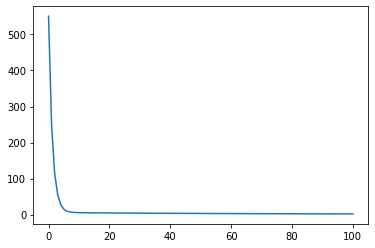

In [133]:
plt.plot(np.arange(len(mdl._loss)), mdl._loss)
plt.show()